In [1]:
import pandas as pd

## Carregando Base de Dados

In [2]:
enem = pd.read_csv('src/enem_2019.csv', index_col=[0])

In [3]:
enem.head()

,NU_INSCRICAO,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,...,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q005,Q006
0,190003903183,2019,19,3,1,1,F,Canindé de São Francisco,SE,2,...,0,0,0,0,B,B,A,A,5,B
1,190005124618,2019,19,2,1,1,F,São Bernardo do Campo,SP,2,...,0,0,0,0,A,A,B,B,4,B
2,190001447215,2019,39,3,2,1,F,Ibititá,BA,1,...,0,0,0,0,B,C,A,A,3,C
3,190003825026,2019,17,3,1,1,M,Tangará da Serra,MT,2,...,0,0,0,0,E,E,D,B,4,F
4,190001995539,2019,17,1,1,1,F,Parnarama,MA,2,...,0,0,0,0,B,E,D,D,5,B


In [4]:
enem.set_index('NU_INSCRICAO', drop=True, inplace=True)

In [5]:
enem.shape

(10000, 33)

In [6]:
enem.head()

,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,...,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q005,Q006
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,19,3,1,1,F,Canindé de São Francisco,SE,2,1.0,...,0,0,0,0,B,B,A,A,5,B
190005124618,2019,19,2,1,1,F,São Bernardo do Campo,SP,2,NaN,...,0,0,0,0,A,A,B,B,4,B
190001447215,2019,39,3,2,1,F,Ibititá,BA,1,1.0,...,0,0,0,0,B,C,A,A,3,C
190003825026,2019,17,3,1,1,M,Tangará da Serra,MT,2,1.0,...,0,0,0,0,E,E,D,B,4,F
190001995539,2019,17,1,1,1,F,Parnarama,MA,2,1.0,...,0,0,0,0,B,E,D,D,5,B


## Verificando Valores NAN

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

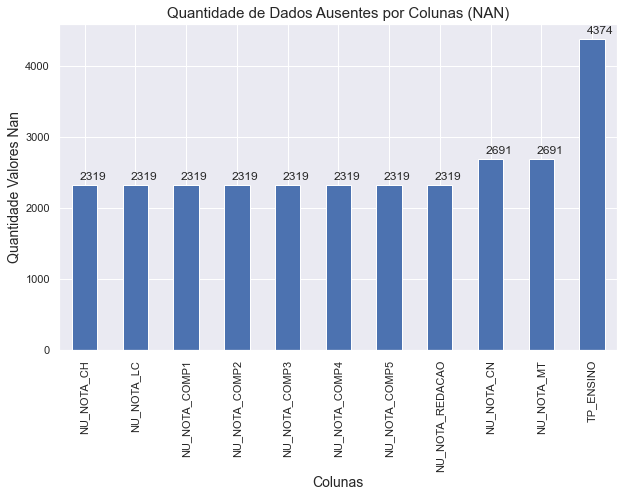

In [8]:
fig = plt.figure(figsize = (10,6))

missing = enem.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)

plot = missing.plot.bar()

plot.set_title("Quantidade de Dados Ausentes por Colunas (NAN)", fontdict={'fontsize':15})

plot.set_xlabel('Colunas', fontdict={'fontsize':14})

plot.set_ylabel('Quantidade Valores Nan', fontdict={'fontsize':14})

for i in range(missing.size):
    plt.annotate(missing.values[i], (-0.1 + i, missing.values[i] + 80))

plt.savefig('img/nan_data.png',  bbox_inches='tight')

In [9]:
var_with_nan = []
def verfify_nan_values(df):
    df_nan = pd.DataFrame()
    var_without_nan = []
    var_column = []
    var_percent = []
    total = df.shape[0]
    count = 0
    for index, value in df.isna().sum().iteritems():
        if value == 0:
            var_without_nan.append(index)
        else:
            percent_with_nan = (value / total) * 100
            var_with_nan.append(count)
            var_column.append(index)
            var_percent.append(percent_with_nan)
        count  = count + 1
    df_nan.insert(0, 'coluna', var_column, True)
    df_nan.insert(1, 'porcentagem_nan %', var_percent, True)

    return df_nan

In [10]:
enem_nan = verfify_nan_values(enem)

writer = pd.ExcelWriter('tabelas/porcentagem_nan.xlsx', engine = 'xlsxwriter')
enem_nan.to_excel(writer)
writer.save()
writer.close()

enem_nan

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


,coluna,porcentagem_nan %
0,TP_ENSINO,43.74
1,NU_NOTA_CN,26.91
2,NU_NOTA_CH,23.19
3,NU_NOTA_LC,23.19
4,NU_NOTA_MT,26.91
5,NU_NOTA_COMP1,23.19
6,NU_NOTA_COMP2,23.19
7,NU_NOTA_COMP3,23.19
8,NU_NOTA_COMP4,23.19
9,NU_NOTA_COMP5,23.19


Conforme tabela acima, foi iremos desconsiderar os dados da coluna TP_ENSINO por conter muitos valores NANs, adotando como padrão excluir colunas com mais de 30% dos dados Nan

In [11]:
enem.drop('TP_ENSINO', axis=1, inplace = True)

In [12]:
enem_without_nan = enem.copy()

Adotando a mediana como valor de preenchimento dos Dados Nan

In [13]:
enem_without_nan.fillna(enem_without_nan.median(), inplace=True)

C:\Users\DESKTOP\AppData\Local\Temp/ipykernel_13816/3000928861.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  enem_without_nan.fillna(enem_without_nan.median(), inplace=True)


In [14]:
verfify_nan_values(enem_without_nan)

,coluna,porcentagem_nan %


In [15]:
enem_without_nan.shape

(10000, 32)

In [16]:
enem_without_nan.head()

,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,NU_NOTA_CN,...,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q005,Q006
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,19,3,1,1,F,Canindé de São Francisco,SE,2,437.9,...,0,0,0,0,B,B,A,A,5,B
190005124618,2019,19,2,1,1,F,São Bernardo do Campo,SP,2,426.2,...,0,0,0,0,A,A,B,B,4,B
190001447215,2019,39,3,2,1,F,Ibititá,BA,1,471.0,...,0,0,0,0,B,C,A,A,3,C
190003825026,2019,17,3,1,1,M,Tangará da Serra,MT,2,359.3,...,0,0,0,0,E,E,D,B,4,F
190001995539,2019,17,1,1,1,F,Parnarama,MA,2,494.7,...,0,0,0,0,B,E,D,D,5,B


In [17]:
enem.describe()

,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q005
count,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,7309.000000,7681.000000,7681.000000,7309.000000,...,7681.000000,7681.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.0000,10000.00000
mean,2019.0,21.916100,2.131600,1.07440,1.029400,1.543600,478.650951,508.523747,522.027327,524.382679,...,93.368051,577.570629,0.0,0.000600,0.0,0.000500,0.001400,0.000600,0.0001,3.85260
std,0.0,7.180684,1.018816,0.44191,0.206252,0.716903,76.404125,83.147337,63.652230,109.964071,...,59.699953,187.971860,0.0,0.024489,0.0,0.022356,0.037392,0.024489,0.0100,1.48926
min,2019.0,14.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,1.00000
25%,2019.0,18.000000,1.000000,1.00000,1.000000,1.000000,418.300000,449.900000,484.800000,436.100000,...,40.000000,480.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,3.00000
50%,2019.0,19.000000,2.000000,1.00000,1.000000,1.000000,471.000000,512.200000,527.300000,501.500000,...,100.000000,580.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,4.00000
75%,2019.0,23.000000,3.000000,1.00000,1.000000,2.000000,536.400000,568.200000,566.400000,598.600000,...,140.000000,680.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,5.00000
max,2019.0,71.000000,5.000000,4.00000,4.000000,4.000000,791.900000,753.300000,733.100000,951.800000,...,200.000000,980.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.0000,20.00000


In [18]:
enem_without_nan.describe()

,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q005
count,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.0000,10000.00000
mean,2019.0,21.916100,2.131600,1.07440,1.029400,1.543600,476.59208,509.376270,523.25006,518.224950,...,94.906000,578.134000,0.0,0.000600,0.0,0.000500,0.001400,0.000600,0.0001,3.85260
std,0.0,7.180684,1.018816,0.44191,0.206252,0.716903,65.40682,72.886836,55.82918,94.555731,...,52.395856,164.741713,0.0,0.024489,0.0,0.022356,0.037392,0.024489,0.0100,1.48926
min,2019.0,14.000000,0.000000,0.00000,0.000000,1.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,1.00000
25%,2019.0,18.000000,1.000000,1.00000,1.000000,1.000000,438.00000,469.600000,500.00000,458.300000,...,80.000000,520.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,3.00000
50%,2019.0,19.000000,2.000000,1.00000,1.000000,1.000000,471.00000,512.200000,527.30000,501.500000,...,100.000000,580.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,4.00000
75%,2019.0,23.000000,3.000000,1.00000,1.000000,2.000000,510.70000,550.600000,553.50000,559.300000,...,120.000000,640.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,5.00000
max,2019.0,71.000000,5.000000,4.00000,4.000000,4.000000,791.90000,753.300000,733.10000,951.800000,...,200.000000,980.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.0000,20.00000


## Tipos de Variáveis

### Variáveis Qualitativas

In [19]:
enem_types = enem_without_nan[[
'NU_ANO',
'TP_SEXO',
'TP_COR_RACA',
'TP_ESTADO_CIVIL',
'TP_NACIONALIDADE',
'SG_UF_RESIDENCIA',
'TP_ST_CONCLUSAO',
'Q001',
'Q002',
'Q003',
'Q004',
'Q006']]

enem_types.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,Q001,Q002,Q003,Q004,Q006
NU_INSCRICAO,,,,,,,,,,,,
190003903183,2019,F,3,1,1,SE,2,B,B,A,A,B
190005124618,2019,F,2,1,1,SP,2,A,A,B,B,B
190001447215,2019,F,3,2,1,BA,1,B,C,A,A,C
190003825026,2019,M,3,1,1,MT,2,E,E,D,B,F
190001995539,2019,F,1,1,1,MA,2,B,E,D,D,B



NU_ANO
TP_SEXO
TP_ESTADO_CIVIL
TP_COR_RACA
TP_NACIONALIDADE
NO_MUNICIPIO_RESIDENCIA
SG_UF_RESIDENCIA
TP_ST_CONCLUSAO
TP_ENSINO
Q001
Q002
Q003
Q004
Q006


VARIÁVEL QUALITATIVA ORDINAL
VARIÁVEL QUALITATIVA NOMINAL DICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [20]:
var_column = [
    'NU_ANO',
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'SG_UF_RESIDENCIA',
    'TP_ST_CONCLUSAO',
    'Q001',
    'Q002',
    'Q003',
    'Q004',
    'Q006',
    'NU_IDADE',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'Q005'
]


var_type = [ 
    'VARIÁVEL QUALITATIVA ORDINAL',
'VARIÁVEL QUALITATIVA NOMINAL DICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA',
'VARIÁVEL QUANTITATIVA DISCRETA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA DISCRETA'
]


In [21]:
df_type = pd.DataFrame()
df_type.insert(0, 'coluna', var_column, True)
df_type.insert(1, 'descrição do tipo', var_type, True)


writer = pd.ExcelWriter('tabelas/tipo_colunas.xlsx', engine = 'xlsxwriter')
df_type.to_excel(writer)
writer.save()
writer.close()

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


#### 2. NU_ANO -> VARIÁVEL QUALITATIVA ORDINAL

In [22]:
enem_types.NU_ANO.value_counts()

2019    10000
Name: NU_ANO, dtype: int64

Eliminar essa variável do conjunto, por ser unica e não ter muita influência pois não existe variação.

In [23]:
enem.drop('NU_ANO', axis=1, inplace = True)

#### 3. TP_SEXO -> VARIÁVEL QUALITATIVA NOMINAL DICOTÔMICA

In [24]:
enem_types.TP_SEXO.value_counts()

F    5925
M    4075
Name: TP_SEXO, dtype: int64

In [25]:
enem_types.TP_SEXO = enem_types.TP_SEXO.astype('category')

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### 4. TP_ESTADO_CIVIL -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [26]:
enem_types.TP_ESTADO_CIVIL.value_counts()

1    8680
2     728
0     396
3     176
4      20
Name: TP_ESTADO_CIVIL, dtype: int64

In [27]:
enem_types.TP_ESTADO_CIVIL = enem_types.TP_ESTADO_CIVIL.astype('category')

#### 5. TP_COR_RACA -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [28]:
enem_types.TP_COR_RACA.value_counts()

3    4662
1    3621
2    1226
4     238
0     192
5      61
Name: TP_COR_RACA, dtype: int64

In [29]:
enem_types.TP_COR_RACA = enem_types.TP_COR_RACA.astype('category')

#### 6. TP_NACIONALIDADE -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

Para esse estudo a nacionalidade não será importante por isso será excluida

In [30]:
enem.drop('TP_NACIONALIDADE', axis=1, inplace = True)

Para não pesar nosso modelo, escolheremos como variável regional a SG_UF_RESIDENCIA que tem menos variações

#### 8. SG_UF_RESIDENCIA -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [31]:
enem_types.SG_UF_RESIDENCIA.value_counts()

SP    1630
MG    1064
BA     769
RJ     651
CE     592
PE     540
PA     540
PR     424
MA     417
RS     413
GO     370
PB     279
RN     239
PI     235
AM     228
SC     207
ES     198
DF     192
AL     173
SE     168
MT     168
MS     138
TO      92
AP      88
RO      85
AC      73
RR      27
Name: SG_UF_RESIDENCIA, dtype: int64

In [32]:
enem_types.SG_UF_RESIDENCIA = enem_types.SG_UF_RESIDENCIA.astype('category')

#### 9. TP_ST_CONCLUSAO -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [33]:
enem_types.TP_ST_CONCLUSAO.value_counts()

1    5854
2    2895
3    1212
4      39
Name: TP_ST_CONCLUSAO, dtype: int64

Para nosso estudo essa variável não será necessária

In [34]:
enem.drop('TP_ST_CONCLUSAO', axis=1, inplace = True)

#### 11. Q001 -> VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [35]:
enem_types.Q001.value_counts()

E    2600
B    2209
C    1434
D    1181
H     836
F     747
A     540
G     453
Name: Q001, dtype: int64

In [36]:
enem_types.Q001 = enem_types.Q001.astype('category')

#### 12. Q002 -> VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [37]:
enem_types.Q002.value_counts()

E    3269
B    1679
C    1365
D    1332
F     986
G     747
A     384
H     238
Name: Q002, dtype: int64

In [38]:
enem_types.Q002 = enem_types.Q002.astype('category')

#### 13. Q003 -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [39]:
enem_types.Q003.value_counts()

C    2403
B    2133
A    2085
D    1749
F    1104
E     526
Name: Q003, dtype: int64

In [40]:
enem_types.Q003 = enem_types.Q003.astype('category')

#### 14. Q004 -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [41]:
enem_types.Q004.value_counts()

B    4292
D    1991
A    1708
F     860
C     745
E     404
Name: Q004, dtype: int64

In [42]:
enem_types.Q004 = enem_types.Q004.astype('category')

#### 15. Q006 -> VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [43]:
enem_types.Q006.value_counts()

C    2626
B    2489
D    1005
E     931
G     603
A     411
F     382
H     374
I     273
J     170
Q     130
N     121
K     114
M     100
L      93
O      90
P      88
Name: Q006, dtype: int64

In [44]:
enem_types.Q006 = enem_types.Q006.astype('category')

Renda Mensal

### Variáveis Quantitativas

In [45]:
enem_quant = enem_without_nan[[
'NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_REDACAO',
'Q005'
]]

enem_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,
190003903183,19,437.9,423.7,457.2,461.9,0.0,5
190005124618,19,426.2,548.7,537.9,427.7,600.0,4
190001447215,39,471.0,512.2,527.3,501.5,580.0,3
190003825026,17,359.3,520.1,430.1,493.3,440.0,4
190001995539,17,494.7,503.7,545.2,585.6,880.0,5


In [94]:
enem_quant.describe()

#varicação - NU_IDADE - 14 AO 71 / CN - 0 AO 791.9 / CH - 0 AO 753.30 / LC - 0 AO 733.10 / MT - 0 AO 951.80 / REDACAO - 0 AO 980 / Q005 - 1 AO 20

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
count,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000
mean,21.916100,476.59208,509.376270,523.25006,518.224950,578.134000,3.85260
std,7.180684,65.40682,72.886836,55.82918,94.555731,164.741713,1.48926
min,14.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.00000
25%,18.000000,438.00000,469.600000,500.00000,458.300000,520.000000,3.00000
50%,19.000000,471.00000,512.200000,527.30000,501.500000,580.000000,4.00000
75%,23.000000,510.70000,550.600000,553.50000,559.300000,640.000000,5.00000
max,71.000000,791.90000,753.300000,733.10000,951.800000,980.000000,20.00000


NU_IDADE
NU_NOTA_CN
NU_NOTA_CH
NU_NOTA_LC
NU_NOTA_MT
NU_NOTA_COMP1
NU_NOTA_COMP2
NU_NOTA_COMP3
NU_NOTA_COMP4
NU_NOTA_COMP5
NU_NOTA_REDACAO

#### 16. NU_IDADE -> VARIÁVEL QUANTITATIVA DISCRETA

#### 17. NU_NOTA_CN -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 18. NU_NOTA_CH -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 19. NU_NOTA_LC -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 20. NU_NOTA_MT -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 21. NU_NOTA_REDACAO -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 22. Q005 -> VARIÁVEL QUANTITATIVA DISCRETA

Quantidade de Pessoas na Residência

## Tratando Outliers

In [46]:
enem_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,
190003903183,19,437.9,423.7,457.2,461.9,0.0,5
190005124618,19,426.2,548.7,537.9,427.7,600.0,4
190001447215,39,471.0,512.2,527.3,501.5,580.0,3
190003825026,17,359.3,520.1,430.1,493.3,440.0,4
190001995539,17,494.7,503.7,545.2,585.6,880.0,5


In [47]:
import numpy as np

In [48]:
def plot_box_plot(df):
    Features = df.columns
    for i in range(len(Features)):
        #plt.subplot(6,3, i + 1)
        plt.figure(figsize = (10,6))
        sns.boxplot(y = df[Features[i]], data = df)
        plt.title(f"Boxplot de {Features[i]}")
        plt.tight_layout()
        plt.savefig('img/box_plot_outliers_{}.png'.format(Features[i]),  bbox_inches='tight')

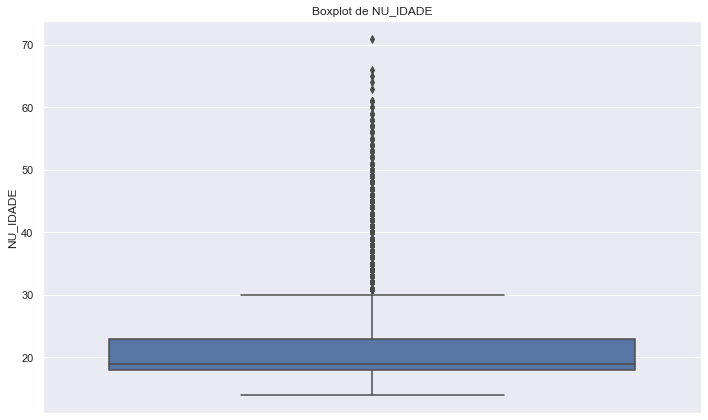

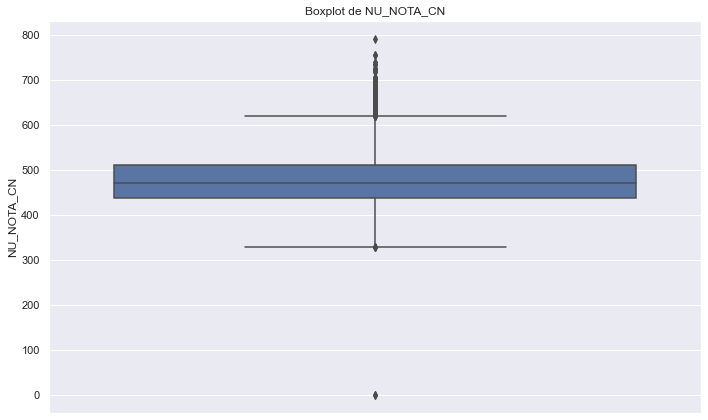

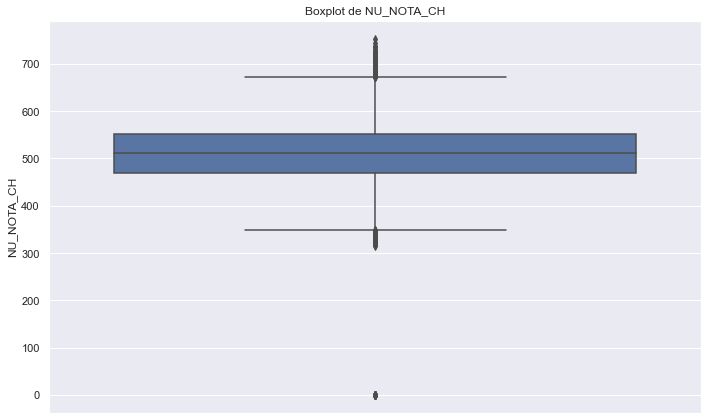

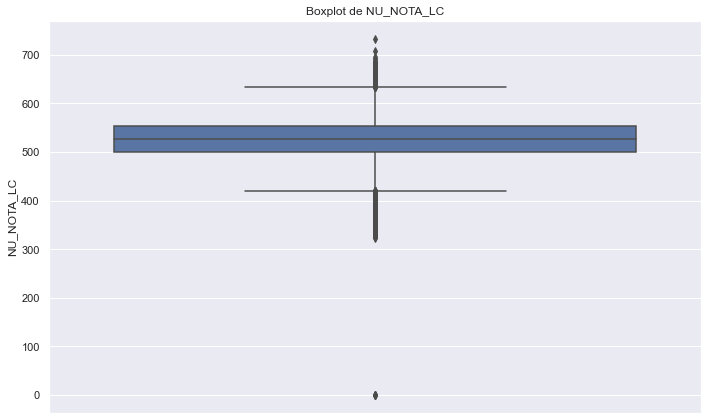

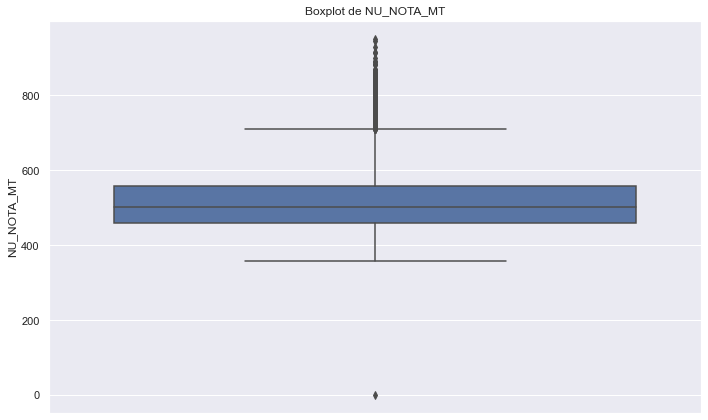

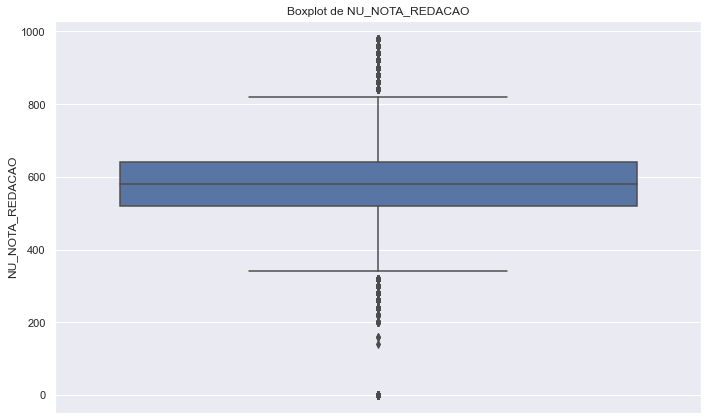

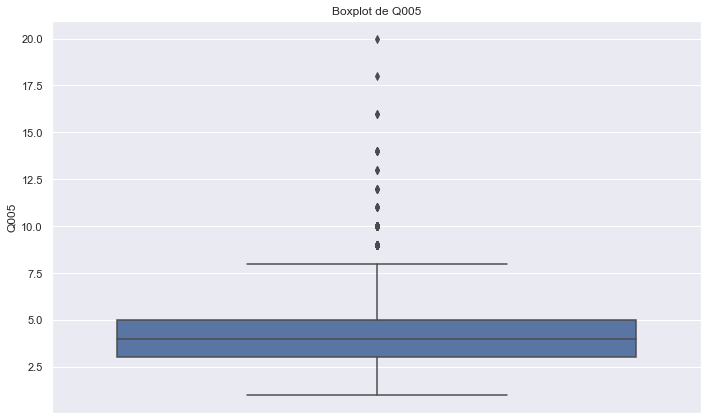

In [49]:
plot_box_plot(enem_quant)

In [50]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    ric = Q3 - Q1
    li = Q1 - (1.5 * ric)
    ls = Q3 + (1.5 * ric)
    return li, ls

In [51]:
enem_quant2 = enem_without_nan[[
'NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_REDACAO',
'Q005'
]]

enem_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,
190003903183,19,437.9,423.7,457.2,461.9,0.0,5
190005124618,19,426.2,548.7,537.9,427.7,600.0,4
190001447215,39,471.0,512.2,527.3,501.5,580.0,3
190003825026,17,359.3,520.1,430.1,493.3,440.0,4
190001995539,17,494.7,503.7,545.2,585.6,880.0,5


In [52]:
columns_list = enem_quant2.columns
for i in columns_list:
    valor = enem_quant2[i]
    Q1, Q3 = valor.quantile([0.25,0.75])
    ric = Q3 - Q1
    li = Q1 - (1.5 * ric)
    ls = Q3 + (1.5 * ric)
    selecao = (valor <= li) | (valor >= ls)
    enem_quant_without_outlies = enem_without_nan[selecao]

In [53]:
enem_quant_without_outlies.shape

(192, 32)

In [54]:
enem_quant_without_outlies_quant = enem_quant_without_outlies[[
'NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_REDACAO',
'Q005'
]]

enem_quant_without_outlies_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,
190002923814,19,471.0,512.2,527.3,501.5,580.0,8
190002545238,18,373.1,385.3,445.3,537.5,520.0,8
190004500892,23,443.1,426.7,491.9,511.8,580.0,8
190004314967,17,471.0,512.2,527.3,501.5,580.0,9
190002358855,17,442.7,495.6,528.0,422.0,340.0,11


Se retirarmos dados com base nos Outliers das Variáveis Quantitativas perdemos maior parte dos dados

In [55]:
enem_quant_without_outlies_quant.shape

(192, 7)

## Gráficos de Análises

In [56]:
import statistics
from scipy import stats

In [57]:
def statistic_analytics(lista, column):
  m = statistics.mean(lista)
  m0 = statistics.mode(lista)
  md = statistics.median(lista)

  # Coeficiente de variação (CV)
  cv = (statistics.stdev(lista) / m)*100

  # Assimetria
  assimetria = stats.skew(lista)

  # Curtose
  curtose = stats.kurtosis(lista)

  print("Coluna = {} CV = {:.2f}% , Assimetria = {:.2f}, Curtose = {:.2f}".format(column, cv, assimetria, curtose))

In [58]:
enem_quant.columns

Index(['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q005'],
      dtype='object')

Coluna = NU_IDADE CV = 32.76% , Assimetria = 2.24, Curtose = 5.63
Coluna = NU_NOTA_CN CV = 13.72% , Assimetria = 0.42, Curtose = 0.91
Coluna = NU_NOTA_CH CV = 14.31% , Assimetria = -0.56, Curtose = 3.51
Coluna = NU_NOTA_LC CV = 10.67% , Assimetria = -0.91, Curtose = 4.51
Coluna = NU_NOTA_MT CV = 18.25% , Assimetria = 0.97, Curtose = 1.05
Coluna = NU_NOTA_REDACAO CV = 28.50% , Assimetria = -0.78, Curtose = 2.75
Coluna = Q005 CV = 38.66% , Assimetria = 1.21, Curtose = 5.53


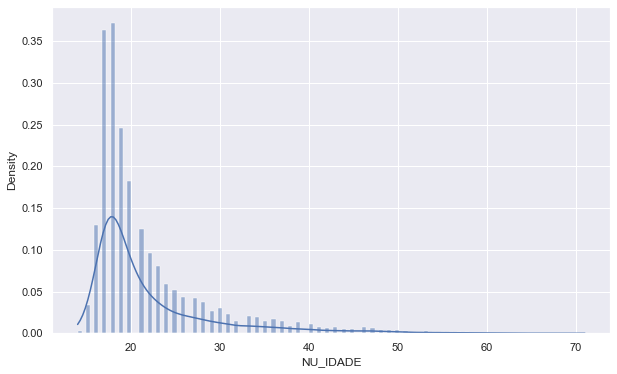

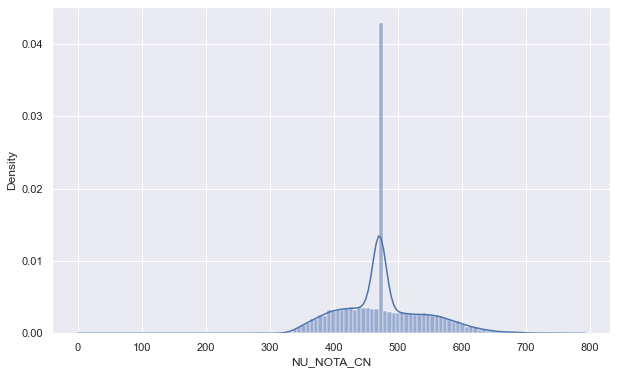

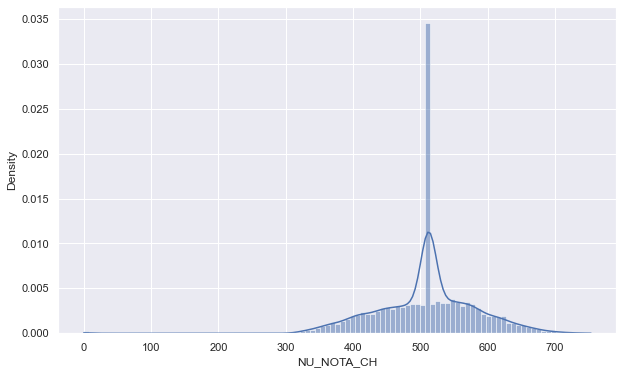

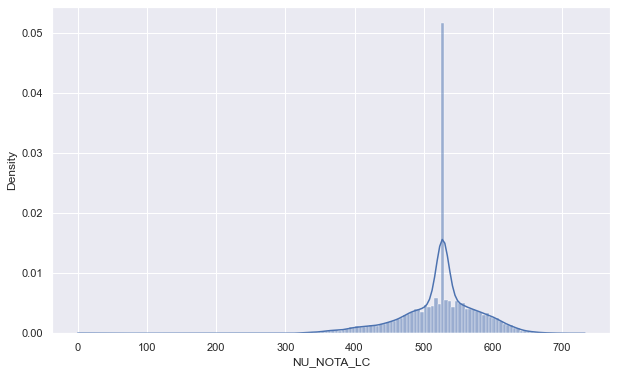

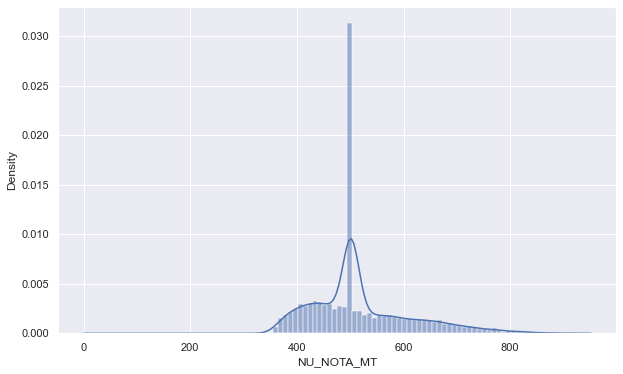

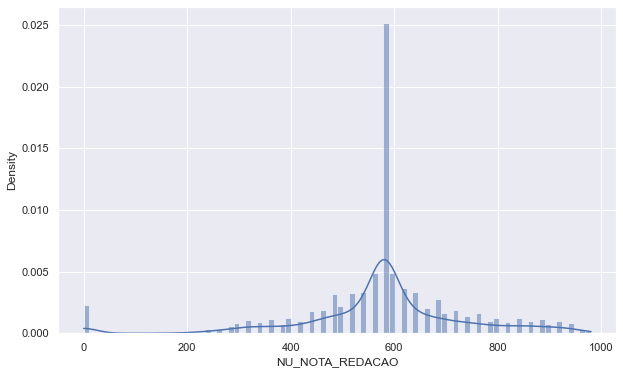

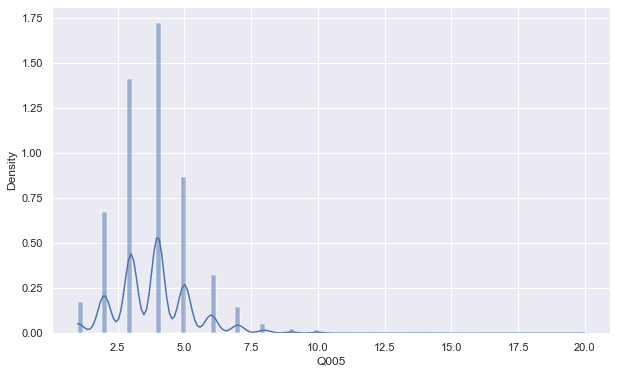

In [59]:
for i in enem_quant.columns:
    plt.figure(figsize=(10,6))

    lista = enem_quant[i]

    statistic_analytics(lista, i)

    sns.histplot(data=lista, stat="density", kde=True)

    plt.savefig('img/distribuicao_{}.png'.format(i),  bbox_inches='tight')




### Resultados

* 'NU_IDADE' - Assimetrica positiva, curva com distribuição normal
* 'NU_NOTA_CN' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_CH' - Assimetrica negativa, curva com distribuição achatada
* 'NU_NOTA_LC' - Assimetrica negativa, curva com distribuição normal
* 'NU_NOTA_MT' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_REDACAO' - Assimetrica, curva com distribuição normal
* 'Q005' - Assimetrica positiva, curva com distribuição alongada

## Correlações

In [60]:
enem_types.shape

(10000, 12)

In [61]:
enem_quant.shape

(10000, 7)

In [62]:
enem_total = pd.concat([enem_types, enem_quant], axis=1)

### Correlação de Pearson

Variáveis Quantitativas

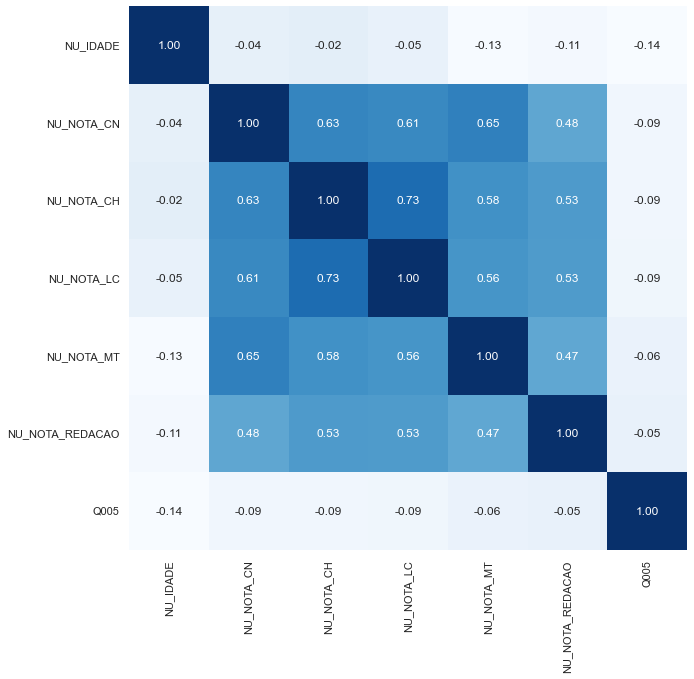

In [63]:
fig = plt.figure(figsize=(10,10))

corr = np.corrcoef(enem_quant.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=enem_quant.columns, yticklabels=enem_quant.columns)


plt.savefig('img/correlacao_pearson.png',  bbox_inches='tight')

### Correlação Qui-Quadrado

Variáveis categoricas

In [64]:
enem_types.columns

Index(['NU_ANO', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESTADO_CIVIL',
       'TP_NACIONALIDADE', 'SG_UF_RESIDENCIA', 'TP_ST_CONCLUSAO', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q006'],
      dtype='object')

In [65]:
df_teste = pd.DataFrame(columns=enem_types.columns)

df_teste['colunas'] = enem_types.columns

In [66]:
df_teste = df_teste.set_index('colunas')

In [67]:
from scipy.stats import chi2_contingency

df = pd.DataFrame(columns=['column1', 'column2', 'p-value'])

for i in enem_types.columns:
    for j in enem_types.columns:
        lista_i = enem_types[i]
        lista_j = enem_types[j]
        tab = pd.crosstab(lista_i, lista_j)
        chi2, p, dof, exp = chi2_contingency(tab.values)
        df_teste.loc[i,j] = p
        linha_df = {'column1': i, 'column2': j, 'p-value': p}
        df = df.append(linha_df, ignore_index=True)

df

,column1,column2,p-value
0,NU_ANO,NU_ANO,1.0
1,NU_ANO,TP_SEXO,1.0
2,NU_ANO,TP_COR_RACA,1.0
3,NU_ANO,TP_ESTADO_CIVIL,1.0
4,NU_ANO,TP_NACIONALIDADE,1.0
...,...,...,...
139,Q006,Q001,0.0
140,Q006,Q002,0.0
141,Q006,Q003,0.0
142,Q006,Q004,0.0


In [68]:
df_teste

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,Q001,Q002,Q003,Q004,Q006
colunas,,,,,,,,,,,,
NU_ANO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TP_SEXO,1.0,0.0,0.007848,0.027407,0.022047,0.016025,0.030317,0.000449,0.000939,0.000066,0.000071,0.0
TP_COR_RACA,1.0,0.007848,0.0,0.0,0.000167,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TP_ESTADO_CIVIL,1.0,0.027407,0.0,0.0,0.809545,0.000113,0.0,0.0,0.0,0.0,0.0,0.001101
TP_NACIONALIDADE,1.0,0.022047,0.000167,0.809545,0.0,0.527364,0.019676,0.253849,0.000132,0.031377,0.00085,0.00036
SG_UF_RESIDENCIA,1.0,0.016025,0.0,0.000113,0.527364,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TP_ST_CONCLUSAO,1.0,0.030317,0.0,0.0,0.019676,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q001,1.0,0.000449,0.0,0.0,0.253849,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q002,1.0,0.000939,0.0,0.0,0.000132,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df_teste = df_teste.astype(float)

corr_quali = df_teste.values

print(type(corr_quali))

<class 'numpy.ndarray'>


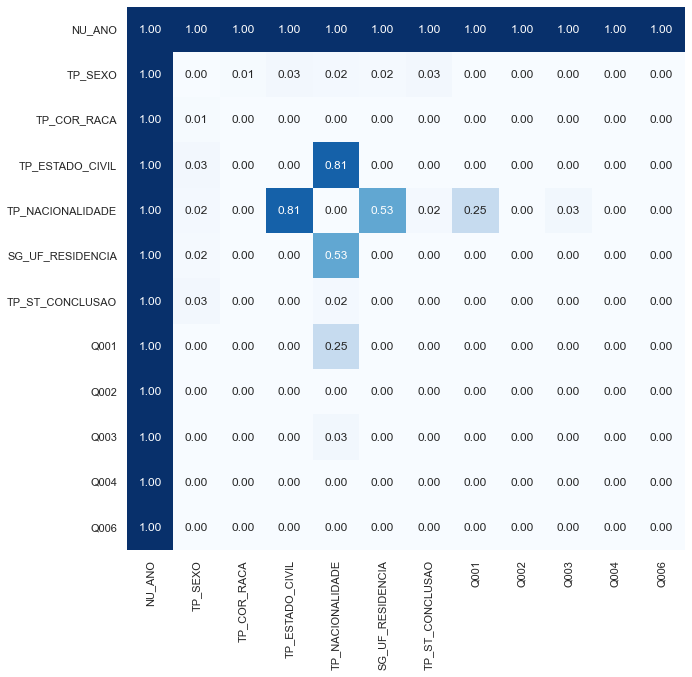

In [70]:
fig = plt.figure(figsize=(10,10))

sns.heatmap(corr_quali, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df_teste.columns, yticklabels=df_teste.columns)

plt.savefig('img/correlacao_qui_qua.png',  bbox_inches='tight')

In [71]:
df.loc[df['p-value'] < 0.05]

,column1,column2,p-value
13,TP_SEXO,TP_SEXO,0.000000
14,TP_SEXO,TP_COR_RACA,0.007848
15,TP_SEXO,TP_ESTADO_CIVIL,0.027407
16,TP_SEXO,TP_NACIONALIDADE,0.022047
17,TP_SEXO,SG_UF_RESIDENCIA,0.016025
...,...,...,...
139,Q006,Q001,0.000000
140,Q006,Q002,0.000000
141,Q006,Q003,0.000000
142,Q006,Q004,0.000000


Correlação:

Com base no teste qui² da correlação das variáveis qualitativas, quais são estatisticamente
correlacionadas com p-value > 5% de significância.

1. Com TP_COR_RACA:
    * NO_MUNICIPIO_RESIDENCIA
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q004
    * Q005
    * Q006

2. Com TP_ESTADO_CIVIL:
    * TP_NACIONALIDADE
    * NO_MUNICIPIO_RESIDENCIA
    * TP_ST_CONCLUSAO

3. Com TP_NACIONALIDADE:
    * TP_ESTADO_CIVIL
    * NO_MUNICIPIO_RESIDENCIA
    * Q003
    * Q005

4. Com NO_MUNICIPIO_RESIDENCIA:
    * TP_COR_RACA
    * TP_ESTADO_CIVIL
    * TP_NACIONALIDADE
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * TP_ENSINO
    * IN_ACESSO
    * Q005
    * Q006

5. Com SG_UF_RESIDENCIA:
    * TP_COR_RACA
    * NO_MUNICIPIO_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q001
    * Q002
    * Q003
    * Q004
    * Q006

6. Com TP_ST_CONCLUSAO:
    * TP_COR_RACA
    * TP_ESTADO_CIVIL
    * NO_MUNICIPIO_RESIDENCIA
    * SG_UF_RESIDENCIA
    * Q001
    * Q002
    * Q003
    * Q004
    * Q005
    * Q006

7. Com TP_ENSINO:
    * NO_MUNICIPIO_RESIDENCIA

8. Com IN_ACESSO:
    * NO_MUNICIPIO_RESIDENCIA
    * Q001
    * Q002
    * Q006

9. Com Q001:
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * IN_ACESSO
    * Q002
    * Q003
    * Q004
    * Q006

10. Com Q002:
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * IN_ACESSO
    * IN_LEDOR
    * Q001
    * Q003
    * Q004
    * Q006

11. Com Q003:
    * TP_NACIONALIDADE
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q001
    * Q002
    * Q004
    * Q006

12. Com Q004:
    * TP_COR_RACA
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q001
    * Q002
    * Q003
    * Q006

13. Com Q005:
    * TP_COR_RACA
    * TP_NACIONALIDADE
    * NO_MUNICIPIO_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q006

14. Com Q006:
    * TP_COR_RACA
    * NO_MUNICIPIO_RESIDENCIA
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * IN_ACESSO
    * Q001
    * Q002
    * Q003
    * Q004
    * Q005


## Variáveis Explicativas e a Variável Dependente

In [72]:
enem_total.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,Q001,Q002,Q003,Q004,Q006,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,
190003903183,2019,F,3,1,1,SE,2,B,B,A,A,B,19,437.9,423.7,457.2,461.9,0.0,5
190005124618,2019,F,2,1,1,SP,2,A,A,B,B,B,19,426.2,548.7,537.9,427.7,600.0,4
190001447215,2019,F,3,2,1,BA,1,B,C,A,A,C,39,471.0,512.2,527.3,501.5,580.0,3
190003825026,2019,M,3,1,1,MT,2,E,E,D,B,F,17,359.3,520.1,430.1,493.3,440.0,4
190001995539,2019,F,1,1,1,MA,2,B,E,D,D,B,17,494.7,503.7,545.2,585.6,880.0,5


### Calculando Variável Dependente

In [73]:
enem_total['NU_NOTA_MEDIA'] = (enem_total.NU_NOTA_CH + enem_total.NU_NOTA_CN + enem_total.NU_NOTA_LC + enem_total.NU_NOTA_MT)/4

### Nota de Corte ENEM:

https://www.guiadacarreira.com.br/educacao/enem/qual-e-a-nota-de-corte-do-enem-2019/

Pegando como base o link acima e a menor e a maior nota de corte:

Administração: 570 a 771
Medicina: 769 a 901

In [74]:
lista_adm = []
lista_med = []

for index, linha in enem_total.iterrows():
    if linha.NU_NOTA_MEDIA > 570:
        lista_adm.append(1)
        if linha.NU_NOTA_MEDIA > 769:
            lista_med.append(1)
        else:
            lista_med.append(0)
    else:
        lista_adm.append(0)
        lista_med.append(0)

In [75]:
enem_total['APPROVED_ADM'] = lista_adm
enem_total['APPROVED_MED'] = lista_med

In [76]:
enem_total.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,Q001,Q002,Q003,...,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA,APPROVED_ADM,APPROVED_MED
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,F,3,1,1,SE,2,B,B,A,...,19,437.9,423.7,457.2,461.9,0.0,5,445.175,0,0
190005124618,2019,F,2,1,1,SP,2,A,A,B,...,19,426.2,548.7,537.9,427.7,600.0,4,485.125,0,0
190001447215,2019,F,3,2,1,BA,1,B,C,A,...,39,471.0,512.2,527.3,501.5,580.0,3,503.000,0,0
190003825026,2019,M,3,1,1,MT,2,E,E,D,...,17,359.3,520.1,430.1,493.3,440.0,4,450.700,0,0
190001995539,2019,F,1,1,1,MA,2,B,E,D,...,17,494.7,503.7,545.2,585.6,880.0,5,532.300,0,0


In [77]:
enem_total.to_csv('enem_tratado.csv')

In [78]:
enem_total

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,Q001,Q002,Q003,...,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA,APPROVED_ADM,APPROVED_MED
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,F,3,1,1,SE,2,B,B,A,...,19,437.9,423.7,457.2,461.9,0.0,5,445.175,0,0
190005124618,2019,F,2,1,1,SP,2,A,A,B,...,19,426.2,548.7,537.9,427.7,600.0,4,485.125,0,0
190001447215,2019,F,3,2,1,BA,1,B,C,A,...,39,471.0,512.2,527.3,501.5,580.0,3,503.000,0,0
190003825026,2019,M,3,1,1,MT,2,E,E,D,...,17,359.3,520.1,430.1,493.3,440.0,4,450.700,0,0
190001995539,2019,F,1,1,1,MA,2,B,E,D,...,17,494.7,503.7,545.2,585.6,880.0,5,532.300,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190005285745,2019,F,3,1,1,BA,2,D,B,B,...,18,430.3,393.4,411.7,489.1,580.0,2,431.125,0,0
190001247842,2019,M,3,1,1,BA,1,C,E,D,...,18,642.3,602.9,618.0,745.1,820.0,5,652.075,1,0
190003996202,2019,M,1,1,1,RJ,2,E,E,D,...,17,438.1,542.4,528.6,464.4,700.0,4,493.375,0,0


## Padronizando variáveis

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
enem_total.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,Q001,Q002,Q003,...,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA,APPROVED_ADM,APPROVED_MED
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,F,3,1,1,SE,2,B,B,A,...,19,437.9,423.7,457.2,461.9,0.0,5,445.175,0,0
190005124618,2019,F,2,1,1,SP,2,A,A,B,...,19,426.2,548.7,537.9,427.7,600.0,4,485.125,0,0
190001447215,2019,F,3,2,1,BA,1,B,C,A,...,39,471.0,512.2,527.3,501.5,580.0,3,503.000,0,0
190003825026,2019,M,3,1,1,MT,2,E,E,D,...,17,359.3,520.1,430.1,493.3,440.0,4,450.700,0,0
190001995539,2019,F,1,1,1,MA,2,B,E,D,...,17,494.7,503.7,545.2,585.6,880.0,5,532.300,0,0


In [81]:
enem_total_quant = enem_total[['NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_REDACAO',
'Q005',
'NU_NOTA_MEDIA']]

In [82]:
enem_total_quant.head()

writer = pd.ExcelWriter('tabelas/quant_sem_padron.xlsx', engine = 'xlsxwriter')
enem_total_quant.to_excel(writer)
writer.save()
writer.close()

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [83]:
enem_total_quant.iloc[:, :] = StandardScaler().fit_transform(enem_total_quant)

writer = pd.ExcelWriter('tabelas/quant_com_padron.xlsx', engine = 'xlsxwriter')
enem_total_quant.to_excel(writer)
writer.save()
writer.close()

enem_total_quant.head()

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,
190003903183,-0.406124,-0.591590,-1.175529,-1.183133,-0.595710,-3.509511,0.770488,-1.007538
190005124618,-0.406124,-0.770479,0.539545,0.262420,-0.957419,0.132736,0.098980,-0.355019
190001447215,2.379266,-0.085501,0.038743,0.072545,-0.176888,0.011327,-0.572528,-0.063061
190003825026,-0.684663,-1.793360,0.147136,-1.668567,-0.263614,-0.838530,0.098980,-0.917296
190001995539,-0.684663,0.276864,-0.077882,0.393182,0.712579,1.832451,0.770488,0.415507


## Dummies

In [84]:
enem_total_quali = enem_total[[
'TP_SEXO',
'TP_COR_RACA',
'TP_ESTADO_CIVIL',
'SG_UF_RESIDENCIA',
'Q001',
'Q002',
'Q003',
'Q004',
'Q006',
'APPROVED_ADM',
'APPROVED_MED']]

In [85]:
enem_total_quali.TP_COR_RACA.value_counts()

3    4662
1    3621
2    1226
4     238
0     192
5      61
Name: TP_COR_RACA, dtype: int64

In [86]:
enem_total_quali = pd.get_dummies(enem_total_quali, drop_first=True)

In [87]:
enem_total_quali

,APPROVED_ADM,APPROVED_MED,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ESTADO_CIVIL_1,TP_ESTADO_CIVIL_2,...,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
190005124618,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
190001447215,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190003825026,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
190001995539,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190005285745,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
190001247842,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
190003996202,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Dataframes Finais

In [88]:
# Qualis Dummizadas
enem_total_quali.to_csv('src/enem_total_quali.csv')

enem_total_quali.head()

,APPROVED_ADM,APPROVED_MED,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ESTADO_CIVIL_1,TP_ESTADO_CIVIL_2,...,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
190005124618,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
190001447215,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190003825026,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
190001995539,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Quantis Padronizadas

enem_total_quant_2 = enem_total[[
'NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_REDACAO',
'Q005',
'NU_NOTA_MEDIA'
]]

enem_total_quant_2.to_csv('src/enem_total_quant.csv')

enem_total_quant_2.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,
190003903183,19,437.9,423.7,457.2,461.9,0.0,5,445.175
190005124618,19,426.2,548.7,537.9,427.7,600.0,4,485.125
190001447215,39,471.0,512.2,527.3,501.5,580.0,3,503.000
190003825026,17,359.3,520.1,430.1,493.3,440.0,4,450.700
190001995539,17,494.7,503.7,545.2,585.6,880.0,5,532.300


In [90]:
# Quantis Padronizadas
enem_total_quant.to_csv('src/enem_total_quant_pad.csv')

enem_total_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,
190003903183,-0.406124,-0.591590,-1.175529,-1.183133,-0.595710,-3.509511,0.770488,-1.007538
190005124618,-0.406124,-0.770479,0.539545,0.262420,-0.957419,0.132736,0.098980,-0.355019
190001447215,2.379266,-0.085501,0.038743,0.072545,-0.176888,0.011327,-0.572528,-0.063061
190003825026,-0.684663,-1.793360,0.147136,-1.668567,-0.263614,-0.838530,0.098980,-0.917296
190001995539,-0.684663,0.276864,-0.077882,0.393182,0.712579,1.832451,0.770488,0.415507


In [91]:
# Total com Dummies e Padronização
enem_total_dum_pad = pd.concat([enem_total_quali, enem_total_quant], axis=1)

enem_total_dum_pad.to_csv('src/enem_total_dum_pad.csv')

enem_total_dum_pad.head()

,APPROVED_ADM,APPROVED_MED,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ESTADO_CIVIL_1,TP_ESTADO_CIVIL_2,...,Q006_P,Q006_Q,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,0,0,0,0,0,1,0,0,1,0,...,0,0,-0.406124,-0.591590,-1.175529,-1.183133,-0.595710,-3.509511,0.770488,-1.007538
190005124618,0,0,0,0,1,0,0,0,1,0,...,0,0,-0.406124,-0.770479,0.539545,0.262420,-0.957419,0.132736,0.098980,-0.355019
190001447215,0,0,0,0,0,1,0,0,0,1,...,0,0,2.379266,-0.085501,0.038743,0.072545,-0.176888,0.011327,-0.572528,-0.063061
190003825026,0,0,1,0,0,1,0,0,1,0,...,0,0,-0.684663,-1.793360,0.147136,-1.668567,-0.263614,-0.838530,0.098980,-0.917296
190001995539,0,0,0,1,0,0,0,0,1,0,...,0,0,-0.684663,0.276864,-0.077882,0.393182,0.712579,1.832451,0.770488,0.415507


In [92]:
# Total com Dummies e sem Padronização
enem_total_dum = pd.concat([enem_total_quali, enem_total_quant_2], axis=1)

enem_total_dum.to_csv('src/enem_total_dum.csv')

enem_total_dum.head()

,APPROVED_ADM,APPROVED_MED,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ESTADO_CIVIL_1,TP_ESTADO_CIVIL_2,...,Q006_P,Q006_Q,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,0,0,0,0,0,1,0,0,1,0,...,0,0,19,437.9,423.7,457.2,461.9,0.0,5,445.175
190005124618,0,0,0,0,1,0,0,0,1,0,...,0,0,19,426.2,548.7,537.9,427.7,600.0,4,485.125
190001447215,0,0,0,0,0,1,0,0,0,1,...,0,0,39,471.0,512.2,527.3,501.5,580.0,3,503.000
190003825026,0,0,1,0,0,1,0,0,1,0,...,0,0,17,359.3,520.1,430.1,493.3,440.0,4,450.700
190001995539,0,0,0,1,0,0,0,0,1,0,...,0,0,17,494.7,503.7,545.2,585.6,880.0,5,532.300


In [93]:
enem_total.to_csv('src/enem_total.csv')

In [95]:
enem_total.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,Q001,Q002,Q003,...,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA,APPROVED_ADM,APPROVED_MED
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,F,3,1,1,SE,2,B,B,A,...,19,437.9,423.7,457.2,461.9,0.0,5,445.175,0,0
190005124618,2019,F,2,1,1,SP,2,A,A,B,...,19,426.2,548.7,537.9,427.7,600.0,4,485.125,0,0
190001447215,2019,F,3,2,1,BA,1,B,C,A,...,39,471.0,512.2,527.3,501.5,580.0,3,503.000,0,0
190003825026,2019,M,3,1,1,MT,2,E,E,D,...,17,359.3,520.1,430.1,493.3,440.0,4,450.700,0,0
190001995539,2019,F,1,1,1,MA,2,B,E,D,...,17,494.7,503.7,545.2,585.6,880.0,5,532.300,0,0
